*Importing necessary dependencies*

In [ ]:
import cv2
import matplotlib.pyplot as plt  # importing matplotlib
import numpy as np
from google.colab.patches import cv2_imshow

*Input*

In [ ]:
IMAGE_NAME = 'puppy.png'
KEY = 0.4

Original Image:



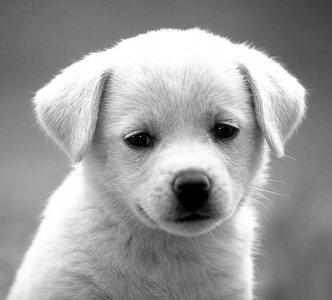

In [ ]:
img = cv2.imread(IMAGE_NAME, 0)
print("Original Image:\n")
cv2_imshow(img)


##**Confusion Phase** 


In [ ]:
def generate_random_indices(rows, cols):
    r = 3.94  # growth rate value for chaotic behaviour
    xN = KEY  # seed 
    seqMap = []

    for i in range(rows):
        list = []
        for j in range(cols):
            xN = r * xN * (1 - xN)
            list.append(xN)
        seqMap.append(np.argsort(list))

    return seqMap

In [ ]:
def confusion(image):
    confused_img = np.array(image)
    (rows, cols) = image.shape
    x = generate_random_indices(rows, cols)
    for r in range(rows):
        for c in range(cols):
            confused_img[r, c], confused_img[r, x[r][c]] = confused_img[r, x[r][c]], confused_img[r, c]
    return confused_img

Confused Image: 



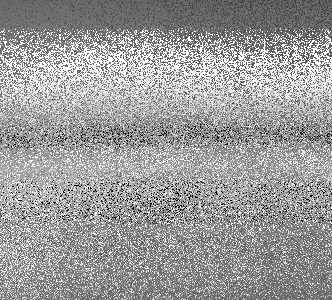

In [ ]:
confused_img = confusion(img)
print("Confused Image: \n")
cv2_imshow(confused_img)

**Comparing Histograms of confused and original image**

Histogram of Original Image: 



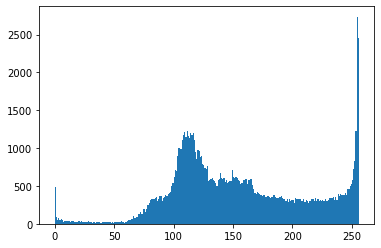

In [ ]:
plt.hist(img.ravel(), 256, [0, 256])
print("Histogram of Original Image: \n")
plt.show()

Histogram of Confused Image: 



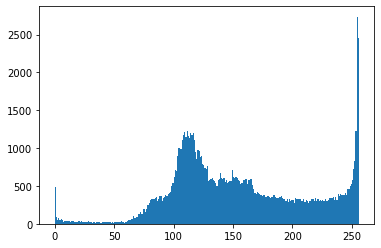

In [ ]:
plt.hist(confused_img.ravel(), 256, [0, 256])
print("Histogram of Confused Image: \n")
plt.show()

##**Diffusion Phase**

In [ ]:
# def convert(bitSequence):
#     decimal = 0
#     for bit in bitSequence:
#         decimal = decimal * 2 + int(bit)
#     return decimal

In [ ]:
def generate_random_seq(rows, cols):
    r = 3.94  # growth rate for chaotic behaviour
    xN = KEY  # seed
    max = 1e6
    seqMap = []

    for i in range(rows):
        list = []
        for j in range(cols):
            #bitlist = []
            #for k in range(8):
            xN = r * xN * (1 - xN)
            #bitlist.append(0 if xN < 0.5 else 1)
            list.append(int((xN*max) % 256))
        seqMap.append(list)
    return seqMap

In [ ]:
def diffusion(image):
    diffused_img = np.array(image)
    (rows, cols) = image.shape
    x = generate_random_seq(rows, cols)
    for r in range(rows):
        for c in range(cols):
            diffused_img[r, c] = diffused_img[r, c] ^ x[r][c]
    return diffused_img

Diffused Image: 



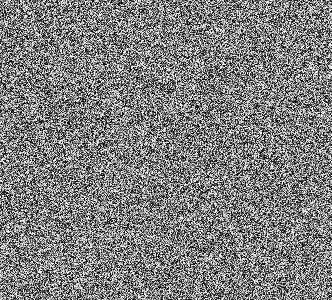

In [ ]:
diffused_img = diffusion(confused_img)
print("Diffused Image: \n")
cv2_imshow(diffused_img)

**Comparing Histograms of original image and diffused image**

Histogram of Original Image: 



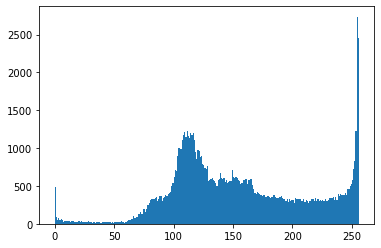

In [ ]:
plt.hist(img.ravel(), 256, [0, 256])
print("Histogram of Original Image: \n")
plt.show()

Histogram of Diffused Image: 



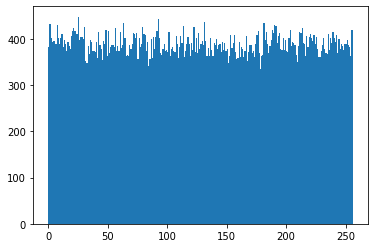

In [ ]:
plt.hist(diffused_img.ravel(), 256, [0, 256])
print("Histogram of Diffused Image: \n")
plt.show()

##**Encryption**

Encrypted Image:



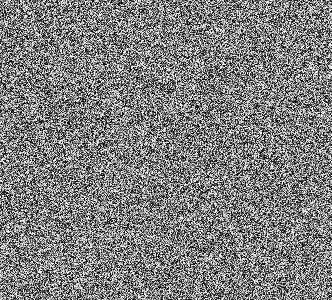

In [ ]:
encrypted_image_name = IMAGE_NAME.split('.')[0] + '_encrypted.' + IMAGE_NAME.split('.')[1]
cv2.imwrite(encrypted_image_name, diffused_img)

encrypted_img = cv2.imread(encrypted_image_name, 0) #loses pixels if jpg is used
# encrypted_img = np.array(diffused_img)
print("Encrypted Image:\n")
cv2_imshow(encrypted_img)

##**Decryption**

In [ ]:
def decrypt_diffusion(image):
    # reverse diffusion
    (rows, cols) = image.shape
    x = generate_random_seq(rows, cols)
    for r in range(rows):
        for c in range(cols):
            image[r, c] = image[r, c] ^ x[r][c]
    return image

In [ ]:
def decrypt_confusion(image):
    # reverse confusion
    (rows, cols) = image.shape
    x = generate_random_indices(rows, cols)
    for r in range(rows-1, -1, -1):
        for c in range(cols-1, -1, -1):
            image[r, c], image[r, x[r][c]] = image[r, x[r][c]], image[r, c]
    return image

In [ ]:
def decrypt(image):
    decrypted_image = np.array(image)
    decrypted_image = decrypt_diffusion(decrypted_image)
    decrypted_image = decrypt_confusion(decrypted_image)
    return decrypted_image

Decrypted Image:



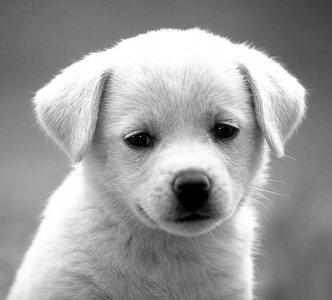

In [ ]:
decrypted_img = decrypt(encrypted_img)

decrypted_image_name = IMAGE_NAME.split('.')[0] + '_decrypted.' + IMAGE_NAME.split('.')[1]
cv2.imwrite(decrypted_image_name, decrypted_img)

print("Decrypted Image:\n")
cv2_imshow(decrypted_img)